initial exploration notebook

In [1]:
import numpy as np
from numpy.fft import fft, fftfreq

from scipy.signal import spectrogram

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.colors import LogNorm

# global
#plt.rcParams['figure.figsize'] = [30, 20]
#plt.rcParams['figure.dpi'] = 72

#### load file and metadata

In [2]:
from IPython.display import Audio

test_file = "../static/audio/test3.mp3"
Audio(test_file)

In [37]:
data.shape

(220500,)

In [48]:
# all formats stereo (but weird array format?)
import audio2numpy as a2n
data,samplerate=a2n.audio_from_file(test_file)

# also all formats but mono
#import librosa
#data, samplerate=librosa.load(test_file)

In [4]:
fs = samplerate
print(f"number of channels = {data.shape[1]}")
print(f"sample rate is {samplerate}")
length = data.shape[0] / samplerate
print(f"sample length {length:.2f}s")

number of channels = 2
sample rate is 44100
sample length 10.00s


In [5]:
# time axis for plotting
time = np.linspace(0., length, data.shape[0])

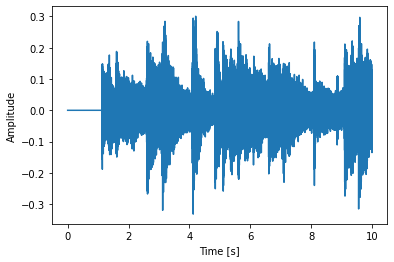

In [6]:
plt.plot(time, data[:, 0], label="Left channel")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

#### scipy spectrogram

In [102]:
?spectrogram

Signature:
spectrogram(
    x,
    fs=1.0,
    window=('tukey', 0.25),
    nperseg=None,
    noverlap=None,
    nfft=None,
    detrend='constant',
    return_onesided=True,
    scaling='density',
    axis=-1,
    mode='psd',
)
Docstring:
Compute a spectrogram with consecutive Fourier transforms.

Spectrograms can be used as a way of visualizing the change of a
nonstationary signal's frequency content over time.

Parameters
----------
x : array_like
    Time series of measurement values
fs : float, optional
    Sampling frequency of the `x` time series. Defaults to 1.0.
window : str or tuple or array_like, optional
    Desired window to use. If `window` is a string or tuple, it is
    passed to `get_window` to generate the window values, which are
    DFT-even by default. See `get_window` for a list of windows and
    required parameters. If `window` is array_like it will be used
    directly as the window and its length must be nperseg.
    Defaults to a Tukey window with shape paramet

In [227]:
f, t, Sxx = spectrogram(data[:, 0], fs, ('tukey', 0.10), scaling='spectrum')
Sxx.shape

(129, 1968)

In [230]:
# log transform because that makes more sense for note frequencies
log10_Sxx = np.log10(Sxx)

/tmp/ipykernel_168405/1865256224.py:2: RuntimeWarning: divide by zero encountered in log10
  log10_Sxx = np.log10(Sxx)


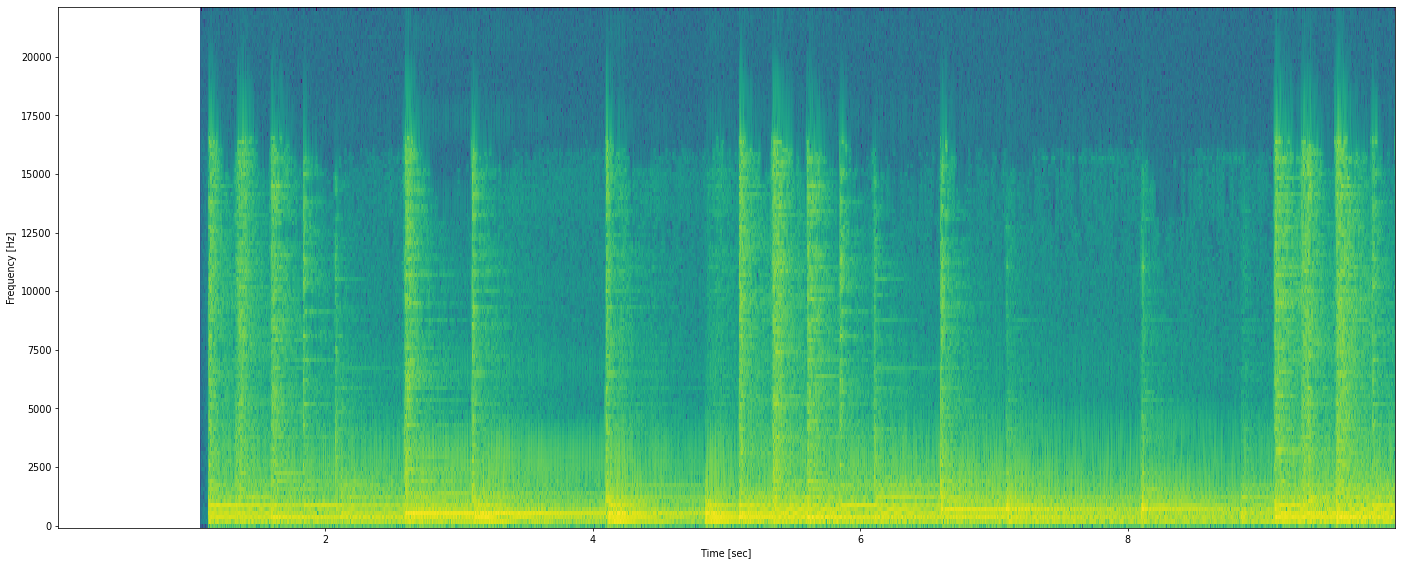

In [231]:
fig = plt.figure(figsize=(25, 10), dpi=69)
plt.pcolormesh(t, f, log10_Sxx, 
               figure=fig)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#### roll your own spectrogram

##### docs

In [ ]:
?plt.pcolormesh

Signature:
plt.pcolormesh(
    *args,
    alpha=None,
    norm=None,
    cmap=None,
    vmin=None,
    vmax=None,
    shading=None,
    antialiased=False,
    data=None,
    **kwargs,
)
Docstring:
Create a pseudocolor plot with a non-regular rectangular grid.

Call signature::

    pcolormesh([X, Y,] C, **kwargs)

*X* and *Y* can be used to specify the corners of the quadrilaterals.

.. hint::

   `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
   and preferred in most cases. For a detailed discussion on the
   differences see :ref:`Differences between pcolor() and pcolormesh()
   <differences-pcolor-pcolormesh>`.

Parameters
----------
C : 2D array-like
    The color-mapped values.

X, Y : array-like, optional
    The coordinates of the corners of quadrilaterals of a pcolormesh::

        (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                              +-----+
                              |     |
                              +-----+
        

In [16]:
?fft

Signature: fft(a, n=None, axis=-1, norm=None)
Docstring:
Compute the one-dimensional discrete Fourier Transform.

This function computes the one-dimensional *n*-point discrete Fourier
Transform (DFT) with the efficient Fast Fourier Transform (FFT)
algorithm [CT].

Parameters
----------
a : array_like
    Input array, can be complex.
n : int, optional
    Length of the transformed axis of the output.
    If `n` is smaller than the length of the input, the input is cropped.
    If it is larger, the input is padded with zeros.  If `n` is not given,
    the length of the input along the axis specified by `axis` is used.
axis : int, optional
    Axis over which to compute the FFT.  If not given, the last axis is
    used.
norm : {"backward", "ortho", "forward"}, optional
    .. versionadded:: 1.10.0

    Normalization mode (see `numpy.fft`). Default is "backward".
    Indicates which direction of the forward/backward pair of transforms
    is scaled and with what normalization factor.

    

In [140]:
?fftfreq

Signature: fftfreq(n, d=1.0)
Docstring:
Return the Discrete Fourier Transform sample frequencies.

The returned float array `f` contains the frequency bin centers in cycles
per unit of the sample spacing (with zero at the start).  For instance, if
the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length `n` and a sample spacing `d`::

  f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
  f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

Parameters
----------
n : int
    Window length.
d : scalar, optional
    Sample spacing (inverse of the sampling rate). Defaults to 1.

Returns
-------
f : ndarray
    Array of length `n` containing the sample frequencies.

Examples
--------
>>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
>>> fourier = np.fft.fft(signal)
>>> n = signal.size
>>> timestep = 0.1
>>> freq = np.fft.fftfreq(n, d=timestep)
>>> freq
array([ 0.  ,  1.25,  2.5 , ..., -3.75, -2.5 , -1.25])
F

##### code

In [26]:
# one channel only
data[: ,0].size/samplerate

10.0

In [ ]:
window = 1024
num_buckets=int(data[:, 0].size/window)

fft_data = np.log10(abs(np.array([fft(data[:, 0][(bucket*window)-window:bucket*window]) for bucket in range(1, num_buckets+1)])).transpose())
fft_data = librosa.power_to_db(fft_data, ref=np.max)

t = np.linspace(0., length, fft_data.shape[1])
f = abs(fftfreq(fft_data.shape[0], d=1/samplerate))

fig = plt.figure(figsize=(25, 10), dpi=69)
plt.pcolormesh(t, f, fft_data, 
              figure=fig)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()